# Madrid Air Quality 2018

The csv shows the air quality parameters (chemicals) measured at each of the stations in Madrid every 24 hours over the course of 4 months (January to April) in 2018. 

date BEN CH4 CO	EBE	NMHC NO	NO_2 NOx O_3 PM10 PM25 SO_2 TCH	TOL	station

However a lot of data is missing per station. And there is no one air quality feature to get from regression. Not sure if methods discussed in class would be appropriate to estimate a bunch of different chemicals.

In [72]:
import csv
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt

with open('madrid_2018.csv', newline='') as csvfile:
    data = list(csv.reader(csvfile))

# creating all data for station 28079004
data = np.array(data)
print(data.shape)
data = data[1:data.shape[0],0:data.shape[1]]
#print(data[0,:])
airq = []
date = []
for i in range(0, data.shape[0]):
    for j in range(0, data.shape[1]):
        if(data[i,-1]=='28079004'):
            if(j==0):
                date.append(data[i,j])
            elif(data[i,j]==''):
                airq.append('0')
            else:
                airq.append(data[i,j])
            
airq = np.array(airq)
date = np.array(date)
airq = np.reshape(airq, (2880,15))
print(airq.shape)
print(date.shape)
#print(date[2])
#print(airq[2,:])

airq = airq.astype(np.float)
#print(airq[3,:])

(69097, 16)
(2880, 15)
(2880,)


# Forecasting Temperature

In [73]:
with open('weatherHistory.csv', newline='') as csvfile:
    predata = list(csv.reader(csvfile))

# creating all data for station 28079004
predata = np.array(predata)
print(data.shape)
predata = predata[1:predata.shape[0],3:-1]
np.random.shuffle(predata)
print(predata[0,:])
target = predata[:,0].astype(float)
data = predata[:,1:6].astype(float)
print(target[0])
print(data[0,:])
print(target.shape)
print(data.shape)

(69096, 16)
['-0.21111111111111056' '-0.21111111111111056' '0.92' '3.2039' '352.0'
 '4.6046000000000005' '0.0' '1039.41']
-0.21111111111111056
[-2.11111111e-01  9.20000000e-01  3.20390000e+00  3.52000000e+02
  4.60460000e+00]
(96453,)
(96453, 5)


1.0020717364886704
1.0351580002558403
1.0338781303619988
1.0230450567710763
1.038429462691012
The average prediction error from 5-fold CV:  1.0265164773137196


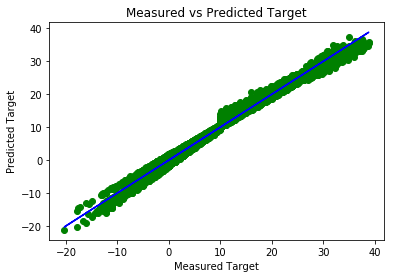

In [74]:
def LS(data, labels):
    w_hat = np.matmul(np.matmul(LA.inv(np.matmul(np.transpose(data), data)), np.transpose(data)), labels)
    return w_hat
    
def LS_error(X, labels, w_hat):
    y_est = np.matmul(X, w_hat)
    error = LA.norm(labels-y_est)**2/X.shape[0]
    return y_est, error

X = np.ones((len(data), 5))
for i in range(0, len(data)):
    for j in range(0, 5):
        X[i, j] = data[i, j]

test1 = X[0:19290]
testlab1 = target[0:19290]
train1 = X[19290:96453] 
label1 = target[19290:96453]

test2 = X[19290:38580, :]
testlab2 = target[19290:38580]
train2 = np.concatenate((X[0:19290, :], X[38580:96453, :]))
label2 = np.concatenate((target[0:19290], target[38580:96453]))

test3 = X[38580:57870, :]
testlab3 = target[38580:57870]
train3 = np.concatenate((X[0:38580, :], X[57870:96453, :]))
label3 = np.concatenate((target[0:38580], target[57870:96453]))

test4 = X[57870:77160, :]
testlab4 = target[57870:77160]
train4 = np.concatenate((X[0:57870, :], X[77160:96453, :]))
label4 = np.concatenate((target[0:57870], target[77160:96453]))

test5 = X[77160:96453, :]
testlab5 = target[77160:96453]
train5 = X[0:77160, :]
label5 = target[0:77160]

w1 = LS(train1, label1)
y1, err1 = LS_error(test1, testlab1, w1)
print(err1)

w2 = LS(train2, label2)
y2, err2 = LS_error(test2, testlab2, w2)
print(err2)

w3 = LS(train3, label3)
y3, err3 = LS_error(test3, testlab3, w3)
print(err3)

w4 = LS(train4, label4)
y4, err4 = LS_error(test4, testlab4, w4)
print(err4)

w5 = LS(train5, label5)
y5, err5 = LS_error(test5, testlab5, w5)
print(err5)

avg = (err1+err2+err3+err4+err5)/5
print("The average prediction error from 5-fold CV: ", avg)

plt.scatter(testlab4, y4, c='g')
plt.plot(testlab4,testlab4, 'b')
plt.title("Measured vs Predicted Target")
plt.xlabel("Measured Target")
plt.ylabel("Predicted Target")
plt.show()

The average prediction error from 5-fold CV:  1.0265164506514348
From index:  49
Thus, the best lambda value: 5.444444444444444


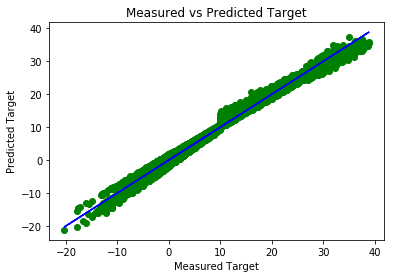

In [79]:
def RR(data, labels, lam):
    w_hat = np.matmul(np.matmul(LA.inv(np.matmul(np.transpose(data), data)+lam*np.identity(5)), np.transpose(data)), labels)
    return w_hat
    
def RR_error(X, labels, w_hat):
    y_est = np.matmul(X, w_hat)
    error = LA.norm(labels-y_est)**2/X.shape[0]
    return y_est, error

#w_hat = RR(X, target, 1)
#print(w_hat.shape)
#LS_error(X, target, w_hat)
lam = np.linspace(0, 10, num=91)
err1 = np.zeros(91)
err2 = np.zeros(91)
err3 = np.zeros(91)
err4 = np.zeros(91)
err5 = np.zeros(91)
avg = np.zeros(91)

for i in range(0, len(lam)):
    w1 = RR(train1, label1, lam[i])
    y1, err1[i] = RR_error(test1, testlab1, w1)

    w2 = RR(train2, label2, lam[i])
    y2, err2[i] = RR_error(test2, testlab2, w2)

    w3 = RR(train3, label3, lam[i])
    y3, err3[i] = RR_error(test3, testlab3, w3)

    w4 = RR(train4, label4, lam[i])
    y4, err4[i] = RR_error(test4, testlab4, w4)

    w5 = RR(train5, label5, lam[i])
    y5, err5[i] = RR_error(test5, testlab5, w5)
    
    avg[i] = (err1[i]+err2[i]+err3[i]+err4[i]+err5[i])/5

print("The average prediction error from 5-fold CV: ", np.min(avg))
print("From index: ", np.argmin(avg))    
print("Thus, the best lambda value:", lam[np.argmin(avg)])

w = RR(train4, label4, lam[np.argmin(avg)])
y, err = RR_error(test4, testlab4, w)

plt.scatter(testlab4, y, c='g')
plt.plot(testlab4,testlab4, 'b')
plt.title("Measured vs Predicted Target")
plt.xlabel("Measured Target")
plt.ylabel("Predicted Target")
plt.show()